<a href="https://colab.research.google.com/github/21Ovi/TensorFlow_/blob/main/03_computer_vison_with_tensorflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithm which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food):https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use 2 classes (pizza🍕 & steak🥩) using the image data modification notebook

> **Note:** We start with with a smaller dataset so we can experiment quickly and figure what works(or better yet what does'nt work)

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-01 02:59:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.153.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.7MB/s    in 3.2s    

2023-02-01 02:59:12 (32.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crutual step at the beginning og any machine learning project project is becomming one with the datqa

And for computer vision project... this usually means visualizing many samples of your data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} names in '{dirpath}'.")

There are 2 directories and 0 names in 'pizza_steak'.
There are 2 directories and 0 names in 'pizza_steak/train'.
There are 0 directories and 750 names in 'pizza_steak/train/pizza'.
There are 0 directories and 750 names in 'pizza_steak/train/steak'.
There are 2 directories and 0 names in 'pizza_steak/test'.
There are 0 directories and 250 names in 'pizza_steak/test/pizza'.
There are 0 directories and 250 names in 'pizza_steak/test/steak'.


In [6]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb  1 02:59 .
drwxr-xr-x 1 root root 4096 Feb  1 02:59 ..
drwxr-xr-x 4 root root 4096 Feb  1 02:59 test
drwxr-xr-x 4 root root 4096 Feb  1 02:59 train


In [7]:
# Another way to find out how many images are there in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, let's first get the class names programmatically

In [8]:
# get the classnames progammatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory ("we'll view images from here")
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape : {img.shape}") # Show the shape of the image

  return img

['8917.jpg']
Image shape : (384, 512, 3)


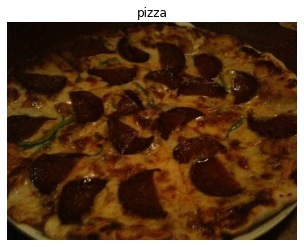

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
# The images we've imported and plotted are actually gaint arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[12,  7,  4],
        [12,  7,  4],
        [11,  6,  3],
        ...,
        [57, 36, 15],
        [53, 35, 13],
        [49, 31,  9]],

       [[13,  8,  5],
        [12,  7,  4],
        [12,  7,  4],
        ...,
        [64, 44, 20],
        [68, 50, 28],
        [71, 53, 31]],

       [[12,  7,  4],
        [12,  7,  4],
        [11,  6,  3],
        ...,
        [61, 41, 16],
        [61, 43, 19],
        [60, 42, 18]],

       ...,

       [[16,  6,  4],
        [17,  7,  5],
        [17,  7,  6],
        ...,
        [64, 36, 15],
        [71, 43, 22],
        [69, 41, 20]],

       [[17,  7,  5],
        [17,  7,  5],
        [17,  7,  6],
        ...,
        [76, 45, 24],
        [72, 44, 23],
        [61, 33, 12]],

       [[15,  5,  3],
        [15,  5,  3],
        [15,  5,  3],
        ...,
        [77, 46, 25],
        [78, 47, 26],
        [64, 36, 14]]], dtype=uint8)>

In [12]:
# View the image shape
img.shape # returns width, height, colour channels

(384, 512, 3)

🔑**Note:** As we've disscussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalized) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel valye)>

In [13]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.04705882, 0.02745098, 0.01568627],
        [0.04705882, 0.02745098, 0.01568627],
        [0.04313725, 0.02352941, 0.01176471],
        ...,
        [0.22352941, 0.14117647, 0.05882353],
        [0.20784314, 0.1372549 , 0.05098039],
        [0.19215686, 0.12156863, 0.03529412]],

       [[0.05098039, 0.03137255, 0.01960784],
        [0.04705882, 0.02745098, 0.01568627],
        [0.04705882, 0.02745098, 0.01568627],
        ...,
        [0.25098039, 0.17254902, 0.07843137],
        [0.26666667, 0.19607843, 0.10980392],
        [0.27843137, 0.20784314, 0.12156863]],

       [[0.04705882, 0.02745098, 0.01568627],
        [0.04705882, 0.02745098, 0.01568627],
        [0.04313725, 0.02352941, 0.01176471],
        ...,
        [0.23921569, 0.16078431, 0.0627451 ],
        [0.23921569, 0.16862745, 0.0745098 ],
        [0.23529412, 0.16470588, 0.07058824]],

       ...,

       [[0.0627451 , 0.02352941, 0.01568627],
        [0.06666667, 0.02745098, 0.01960784],
        [0.06666667, 0

## An end-to-end example

Let's build a Convolutional Neural Network to find patterns in our images, more specifically we need a way to:
* Load our images
*preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 289ms/step - loss: 0.6164 - accuracy: 0.6413 - val_loss: 0.4264 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 9s 181ms/step - loss: 0.4456 - accuracy: 0.7953 - val_loss: 0.3540 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4221 - accuracy: 0.8173 - val_loss: 0.3335 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3962 - accuracy: 0.8333 - val_loss: 0.3252 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3405 - accuracy: 0.8473 - val_loss: 0.3098 - val_accuracy: 0.8620


> 🔑**Note**: If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset.



In [15]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

🛠 Practice: Step through each of the main blocks of code in the cell above, what do you think each is doing? It's okay if you're not sure, we'll go through this soon. In the meantime, spend 10-minutes playing around the incredible [CNN explainer website](https://poloclub.github.io/cnn-explainer/). What do you notice about the layer names at the top of the webpage?

## Using the same model as before

KLet's replicate the model we've built in a previous section to see if it works with our image data

The model we're building is from the [TensorFlow Playground](http://playground.tensorflow.org/)

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFloe Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 174ms/step - loss: 0.8869 - accuracy: 0.5080 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 168ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [17]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x parameters than our CNN (model_1), model_2 performs teribly... let's try

In [18]:
#  Set random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 2.5934 - accuracy: 0.6287 - val_loss: 1.1770 - val_accuracy: 0.6920
Epoch 2/5
47/47 [==============================] - 8s 171ms/step - loss: 0.7899 - accuracy: 0.7080 - val_loss: 0.4673 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.5867 - accuracy: 0.7393 - val_loss: 0.4512 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.5044 - accuracy: 0.7853 - val_loss: 0.4845 - val_accuracy: 0.7680
Epoch 5/5
47/47 [==============================] - 8s 171ms/step - loss: 0.4546 - accuracy: 0.7980 - val_loss: 0.6374 - val_accuracy: 0.7120


In [19]:
# Gte a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


🔑**Note:** You can think of trainable parameters as `patterns a model can learn from data`.Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a possible series of dense layers has a number of different learnable patterns, `a convolutional neurl network seeks to sort out and learn the most important patterns in an image`. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different `features` in an image.

In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary Classification: let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main steps here was scaling/normalizing & turn our data into batch size)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['720060.jpg']
Image shape : (304, 512, 3)
['3554287.jpg']
Image shape : (512, 512, 3)


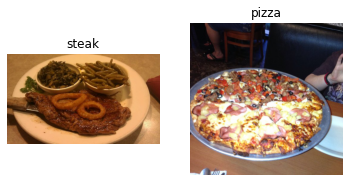

In [21]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepared it for our model)

In [22]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
testdir = "pizza_steak/test/"

Our next step is to turn our data into `batches`.

A Batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processir (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

why 32?

Because 32 is good for your health...

In [23]:
# Create train and test data genetrators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                              target_size=(224, 224), # Target size of images (height, width)
                                              class_mode="binary", # type of data you're working with
                                              batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get a sample of a training data batcg
images, labels = train_data.next() # Get tge "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [26]:
# How many batches are there ?
len(train_data)

47

In [27]:
1500/32

46.875

In [28]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [29]:
images[7].shape

(224, 224, 3)

In [30]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a model (start with a baseline)

A baseline is a relatively simple moddel or existing result that you setup when u keep beginning a machine learning experiment and then you experimenting, you try to beat the baseline.


🔑**Note:** In deep learning, there is almost an infinite amount of architecture you could create. So one of the best ways yo get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [31]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [32]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # Filter is the number of sliding windows going across an input (higer = more complex model)
           kernel_size=3, # The size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes accross the windows
           padding="valid", # If "same", output shape is same as input shape,if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # Inpu layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # Output layer (working with binary classification so only 1 output neuron)
])

In [33]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [34]:
# Get the summary of the model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [35]:
# Check the lenghs of training and test data generator
len(train_data), len(test_data)

(47, 16)

In [36]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 193ms/step - loss: 0.9899 - accuracy: 0.6707 - val_loss: 0.4718 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 12s 247ms/step - loss: 0.4360 - accuracy: 0.8153 - val_loss: 0.3948 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 18s 374ms/step - loss: 0.2895 - accuracy: 0.8827 - val_loss: 0.3510 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.1319 - accuracy: 0.9573 - val_loss: 0.4933 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.0646 - accuracy: 0.9760 - val_loss: 0.5400 - val_accuracy: 0.7940


In [37]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 128ms/step - loss: 0.3098 - accuracy: 0.8620


[0.3098418414592743, 0.8619999885559082]

In [38]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [39]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 130ms/step - loss: 0.5400 - accuracy: 0.7940


[0.5399850606918335, 0.7940000295639038]

### 5. Evaluate our model

It looks like our model is learning something, let's evaluate it

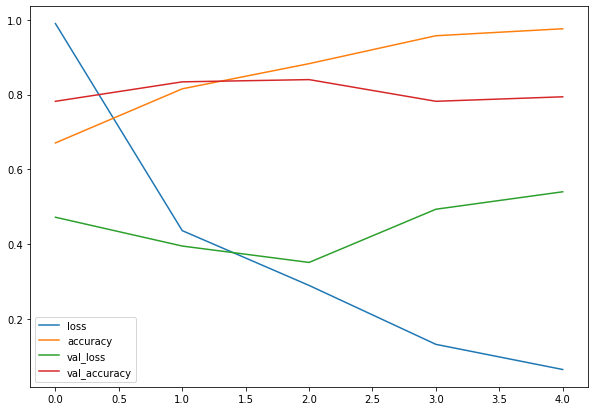

In [40]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [41]:
# Plt the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metriics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # How many eopochs we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

🔑**Note:** When a model's `validation loss starts to increase`, it's likely that the model is `overfitting` the training dataset. This means, it's learning the pattern in the training the dataset too well and thus the model's ability to generalize to unseen data will be diminished. 

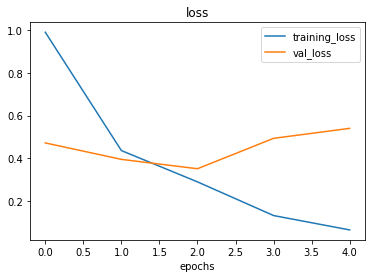

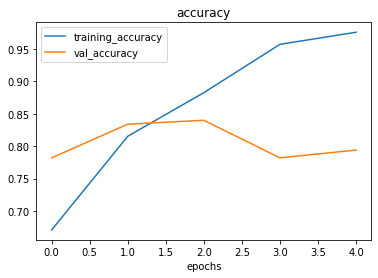

In [42]:
# Check out the loss and accuacy of model_4
plot_loss_curves(history_4)

🔑**Note:**Ideally the loss curves (training and validation) will be very similar to each other (training loss and validation loss decreaseing at similat rates), when there are large difference your model may be `overfitting`.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps : 
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to include overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting :
* Add data agumentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑**Note:** Reducing overfitting is also known as `Regularization`

In [43]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(223, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [44]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [45]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 18s 375ms/step - loss: 0.6269 - accuracy: 0.6167 - val_loss: 0.5324 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 13s 279ms/step - loss: 0.4737 - accuracy: 0.7800 - val_loss: 0.3799 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4359 - accuracy: 0.8027 - val_loss: 0.3639 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 8s 181ms/step - loss: 0.3982 - accuracy: 0.8300 - val_loss: 0.3456 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.3643 - accuracy: 0.8487 - val_loss: 0.4460 - val_accuracy: 0.7880


In [46]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 221, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

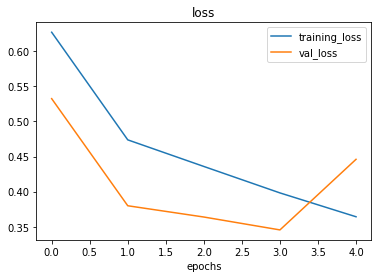

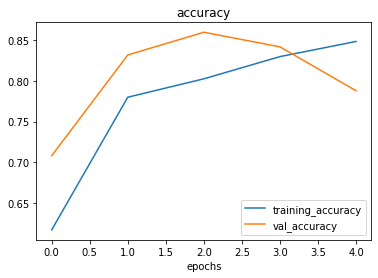

In [47]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening out bag of tricks and finding data agumentation

In [48]:
# Create ImageDataGenerator training instance with data agumentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.
                                             ,rotation_range=0.2, # how much you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly your image?
                                             width_shift_range=0.2, # move your image around on the x-axis?
                                             height_shift_range=0.3, # move your image around on the y-axis?
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> What is data augmentation

Data augmentation is the process pf altering our training data, leading it to have more diversity and in turn alowing our models to learn more generalizable (hopefully) patterns. Altering might adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [49]:
# Import data and augment it frrom training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode="binary",
                                                                  shuffle=False) # for demonstraion purpose only

# Create non-augmented train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)   

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data: ")                                                               
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Non-augmented test data: 
Found 500 images belonging to 2 classes.


🔑 **Note:** Data augmentation is usually only performed on the training data. using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [50]:
# Get sample augmented data batches
images, iabels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aearen't augmented... only data (images)

Showing image number:23


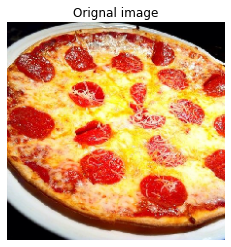

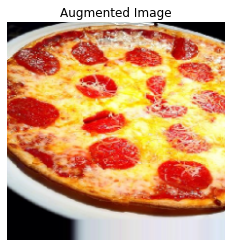

In [51]:
# Show the orignal image and augmented image
import random
random_number = random.randint(0, 31) # our batch size is 32
print(f"Showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Orignal image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data

In [52]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # Fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 616ms/step - loss: 0.7481 - accuracy: 0.4453 - val_loss: 0.6876 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 22s 458ms/step - loss: 0.6960 - accuracy: 0.5207 - val_loss: 0.6696 - val_accuracy: 0.6080
Epoch 3/5
47/47 [==============================] - 21s 447ms/step - loss: 0.7138 - accuracy: 0.5707 - val_loss: 0.6777 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 21s 443ms/step - loss: 0.6889 - accuracy: 0.5140 - val_loss: 0.6806 - val_accuracy: 0.6100
Epoch 5/5
47/47 [==============================] - 27s 577ms/step - loss: 0.6847 - accuracy: 0.5413 - val_loss: 0.6686 - val_accuracy: 0.5880


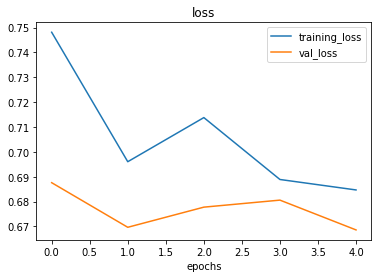

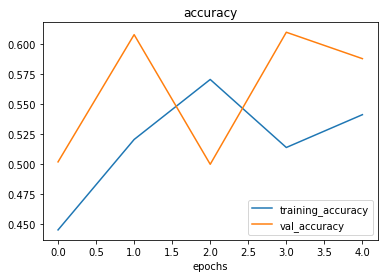

In [53]:
# Check our model's training curves
plot_loss_curves(history_6)

Let's shuffle our training data and augmented training data and then train another model (the same as above) and see whats happens

In [54]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode="binary",
                                                                   batch_size=32,
                                                                   shuffle=True) # Shuffle data this time

Found 1500 images belonging to 2 classes.


In [55]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on train_data_augmented_shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 530ms/step - loss: 0.6537 - accuracy: 0.6187 - val_loss: 0.6284 - val_accuracy: 0.5680
Epoch 2/5
47/47 [==============================] - 23s 479ms/step - loss: 0.5827 - accuracy: 0.6880 - val_loss: 0.4418 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 29s 617ms/step - loss: 0.5021 - accuracy: 0.7460 - val_loss: 0.3885 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 43s 918ms/step - loss: 0.4789 - accuracy: 0.7820 - val_loss: 0.3412 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 24s 504ms/step - loss: 0.4965 - accuracy: 0.7620 - val_loss: 0.3710 - val_accuracy: 0.8500


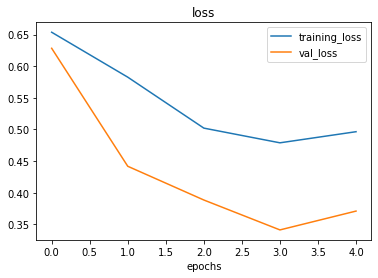

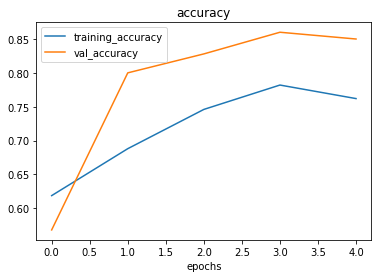

In [56]:
# Plot loss curves
plot_loss_curves(history_7)

🔑**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across the wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. 10 to 32 or even 64)
* Find the ideal learning rate
* Get more data (give model more oppertunities to learn
* Use `Transfer Learning` to leverage what another image model has learn and adjust it for our own use case

## making a prediction with our trained model on our won custon data

In [57]:
print(class_names)

['pizza' 'steak']


--2023-02-01 03:08:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-02-01 03:08:30 (88.3 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



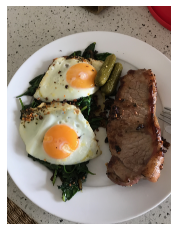

In [58]:
# View our example images
import matplotlib.image as npimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = npimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [59]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

🔑**Note :** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into same format as the data your model was trained on.

In [60]:
expanded_steak = tf.expand_dims(steak, axis=0)
expanded_steak.shape

TensorShape([1, 4032, 3024, 3])

In [61]:
# Create a function to import a an image and resize it to abe to use with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to
   (img_shape, img_shape, color_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Reshape the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image and get all the values between 0 and 1
  img = img/255.
  return img

In [62]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [63]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 163ms/step


array([[0.91410965]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [64]:
# Remind our self of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [65]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [66]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with 
  model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predict class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 15ms/step


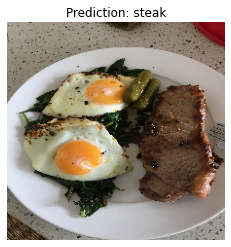

In [67]:
# Test our model on a custom image
pred_and_plot(model_7,"03-steak.jpeg")

Our model works! Let's try it on another image... thhis time pizza

--2023-02-01 03:08:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2023-02-01 03:08:32 (111 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 17ms/step


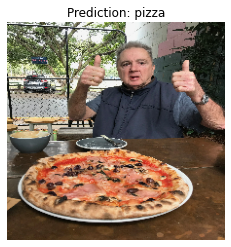

In [68]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to steop things up a notch with 10 classes of food (multi-class classification)

1. Become one with data
2. preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and imporve the model(try to beat baseline/ reduce overfitting)
7. Repeat until satisfied.

## 1. Import and become one with the data

In [69]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-02-01 03:08:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 142.250.145.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  29.8MB/s    in 17s     

2023-02-01 03:08:50 (28.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [70]:
import os

# Walck through 10 class of food image data
for dirpath, dirname, filenames in os.walk("10_food_classes_all_data.zip"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [70]:
!ls -la 10_food_class_all_data/

In [71]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [73]:
# Let's get class names
import pathlib 
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1784142.jpg']
Image shape : (419, 512, 3)


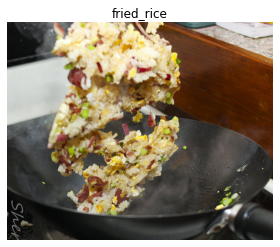

In [81]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))